In [104]:
import pandas as pd
import matplotlib.pyplot as plt
# https://www.kaggle.com/datasets/rohitudageri/credit-card-details

In [105]:
credit_card = pd.read_csv('Credit_card.csv')
credit_card

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,1,0,0,0,NaN,2
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,-586,1,1,1,0,NaN,2
3,5009749,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1543,5028645,F,N,Y,0,NaN,Commercial associate,Higher education,Married,House / apartment,-11957.0,-2182,1,0,0,0,Managers,2
1544,5023655,F,N,N,0,225000.0,Commercial associate,Incomplete higher,Single / not married,House / apartment,-10229.0,-1209,1,0,0,0,Accountants,1
1545,5115992,M,Y,Y,2,180000.0,Working,Higher education,Married,House / apartment,-13174.0,-2477,1,0,0,0,Managers,4
1546,5118219,M,Y,N,0,270000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,-15292.0,-645,1,1,1,0,Drivers,2


In [106]:
credit_card_label = pd.read_csv('Credit_card_label.csv')
credit_card_label
# this is what we want to predict

,Ind_ID,label
0,5008827,1
1,5009744,1
2,5009746,1
3,5009749,1
4,5009752,1
...,...,...
1543,5028645,0
1544,5023655,0
1545,5115992,0
1546,5118219,0


<Axes: xlabel='spam', ylabel='credit card rejected'>

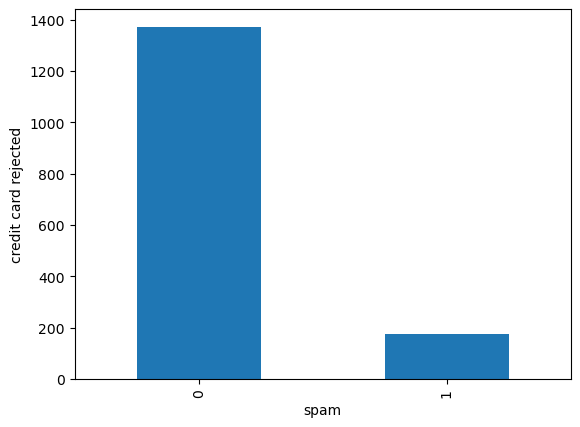

In [107]:
credit_card_label['label'].value_counts().plot.bar(ylabel='credit card rejected', xlabel='spam')
# imbalanced dataset

(array([ 14., 178., 433., 321., 286., 110.,  75.,  42.,  14.,  33.,   3.,
          4.,   3.,   1.,   0.,   1.,   1.,   0.,   4.]),
 array([     0.,  50000., 100000., 150000., 200000., 250000., 300000.,
        350000., 400000., 450000., 500000., 550000., 600000., 650000.,
        700000., 750000., 800000., 850000., 900000., 950000.]),
 <BarContainer object of 19 artists>)

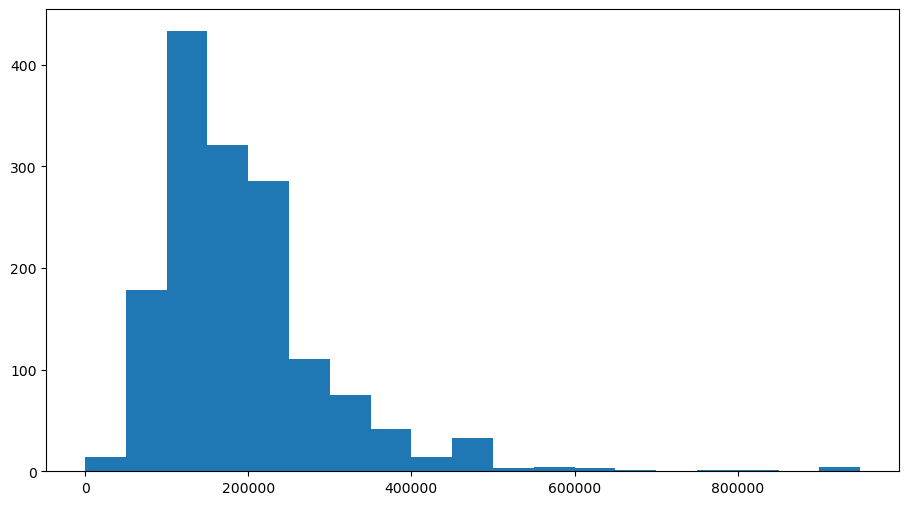

In [108]:
plt.figure(figsize=(11, 6))
plt.hist(credit_card['Annual_income'], bins=[i*50000 for i in range(20)])
# doesn't include all the values, but there aren't many above $1 million
# most of the values are between $50k and $250k

In [109]:
credit_card.isna().sum()
# Looks like there are nans in gender, annual_income, birthday_count, and type_occupation

Ind_ID               0
GENDER               7
Car_Owner            0
Propert_Owner        0
CHILDREN             0
Annual_income       23
Type_Income          0
EDUCATION            0
Marital_status       0
Housing_type         0
Birthday_count      22
Employed_days        0
Mobile_phone         0
Work_Phone           0
Phone                0
EMAIL_ID             0
Type_Occupation    488
Family_Members       0
dtype: int64

In [110]:
credit_card['Annual_income_missing'] = credit_card['Annual_income'].isna()
credit_card['Birthday_count_missing'] = credit_card['Birthday_count'].isna()
credit_card

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,Annual_income_missing,Birthday_count_missing
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,1,0,0,0,NaN,2,False,False
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,False,False
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,-586,1,1,1,0,NaN,2,False,True
3,5009749,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,True,False
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1543,5028645,F,N,Y,0,NaN,Commercial associate,Higher education,Married,House / apartment,-11957.0,-2182,1,0,0,0,Managers,2,True,False
1544,5023655,F,N,N,0,225000.0,Commercial associate,Incomplete higher,Single / not married,House / apartment,-10229.0,-1209,1,0,0,0,Accountants,1,False,False
1545,5115992,M,Y,Y,2,180000.0,Working,Higher education,Married,House / apartment,-13174.0,-2477,1,0,0,0,Managers,4,False,False
1546,5118219,M,Y,N,0,270000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,-15292.0,-645,1,1,1,0,Drivers,2,False,False


In [111]:
credit_card['Annual_income'].fillna(0, inplace=True)
credit_card['Birthday_count'].fillna(0, inplace=True)

In [112]:
credit_card_one_hot = pd.get_dummies(credit_card)
credit_card_one_hot

,Ind_ID,CHILDREN,Annual_income,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Family_Members,...,Type_Occupation_Laborers,Type_Occupation_Low-skill Laborers,Type_Occupation_Managers,Type_Occupation_Medicine staff,Type_Occupation_Private service staff,Type_Occupation_Realty agents,Type_Occupation_Sales staff,Type_Occupation_Secretaries,Type_Occupation_Security staff,Type_Occupation_Waiters/barmen staff
0,5008827,0,180000.0,-18772.0,365243,1,0,0,0,2,...,0,0,0,0,0,0,0,0,0,0
1,5009744,0,315000.0,-13557.0,-586,1,1,1,0,2,...,0,0,0,0,0,0,0,0,0,0
2,5009746,0,315000.0,0.0,-586,1,1,1,0,2,...,0,0,0,0,0,0,0,0,0,0
3,5009749,0,0.0,-13557.0,-586,1,1,1,0,2,...,0,0,0,0,0,0,0,0,0,0
4,5009752,0,315000.0,-13557.0,-586,1,1,1,0,2,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1543,5028645,0,0.0,-11957.0,-2182,1,0,0,0,2,...,0,0,1,0,0,0,0,0,0,0
1544,5023655,0,225000.0,-10229.0,-1209,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1545,5115992,2,180000.0,-13174.0,-2477,1,0,0,0,4,...,0,0,1,0,0,0,0,0,0,0
1546,5118219,0,270000.0,-15292.0,-645,1,1,1,0,2,...,0,0,0,0,0,0,0,0,0,0


In [113]:
X = credit_card_one_hot.drop(['Ind_ID'], axis=1)
y = credit_card_label['label']
X, y

(      CHILDREN  Annual_income  Birthday_count  Employed_days  Mobile_phone  \
 0            0       180000.0        -18772.0         365243             1   
 1            0       315000.0        -13557.0           -586             1   
 2            0       315000.0             0.0           -586             1   
 3            0            0.0        -13557.0           -586             1   
 4            0       315000.0        -13557.0           -586             1   
 ...        ...            ...             ...            ...           ...   
 1543         0            0.0        -11957.0          -2182             1   
 1544         0       225000.0        -10229.0          -1209             1   
 1545         2       180000.0        -13174.0          -2477             1   
 1546         0       270000.0        -15292.0           -645             1   
 1547         0       225000.0        -16601.0          -2859             1   
 
       Work_Phone  Phone  EMAIL_ID  Family_Members

In [114]:
from sklearn.model_selection import train_test_split
  
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42)

In [115]:
from sklearn.linear_model import LogisticRegression
  
classifier = LogisticRegression(random_state = 42)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [116]:
y_pred = classifier.predict(X_test)

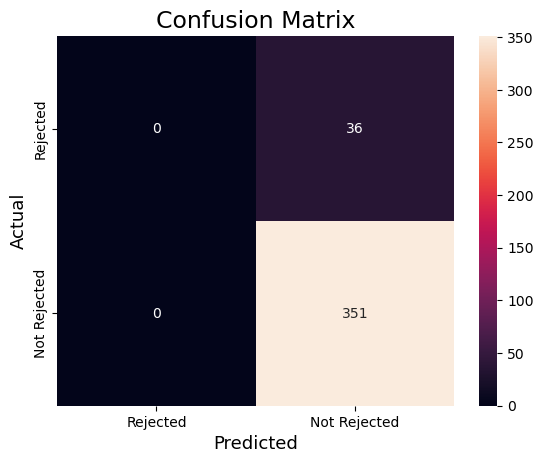

In [117]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

labels = [1, 0]
cm = confusion_matrix(y_test,y_pred, labels=labels)

sns.heatmap(cm,
            annot=True,
            fmt='g',
            xticklabels=['Rejected','Not Rejected'],
            yticklabels=['Rejected','Not Rejected'])
plt.ylabel('Actual',fontsize=13)
plt.xlabel('Predicted',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()
# logistic regression not doing so well

In [118]:
y_pred
# predicts no card will be rejected...

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [119]:
classifier.predict_proba(X_test)
# predicting 80+% for most rows... may be worth balancing the dataset a little

array([[0.80758394, 0.19241606],
       [0.86372596, 0.13627404],
       [0.85360902, 0.14639098],
       [0.88445134, 0.11554866],
       [0.82227877, 0.17772123],
       [0.7946198 , 0.2053802 ],
       [0.91079907, 0.08920093],
       [0.89835146, 0.10164854],
       [0.90009445, 0.09990555],
       [0.8963426 , 0.1036574 ],
       [0.86742242, 0.13257758],
       [0.92848695, 0.07151305],
       [0.85369143, 0.14630857],
       [0.87240669, 0.12759331],
       [0.89039228, 0.10960772],
       [0.90840626, 0.09159374],
       [0.80354171, 0.19645829],
       [0.81129379, 0.18870621],
       [0.90242301, 0.09757699],
       [0.88573413, 0.11426587],
       [0.83842266, 0.16157734],
       [0.7827089 , 0.2172911 ],
       [0.86828055, 0.13171945],
       [0.83818514, 0.16181486],
       [0.82419323, 0.17580677],
       [0.87253284, 0.12746716],
       [0.85921203, 0.14078797],
       [0.90118116, 0.09881884],
       [0.82110134, 0.17889866],
       [0.89331116, 0.10668884],
       [0.

In [120]:
credit_card_label['label'].value_counts()
# about 8 times as many cards accepted as rejected

0    1373
1     175
Name: label, dtype: int64

In [121]:
import imblearn
from imblearn.over_sampling import RandomOverSampler
oversample = RandomOverSampler(sampling_strategy=0.5)

In [122]:
X_train, y_train = oversample.fit_resample(X_train, y_train)

In [123]:
y_train.sum()/y_train.count()
# now a third of the data is rejected credit card

0.3333333333333333

In [124]:
# try logistic regression again
classifier = LogisticRegression(random_state = 42)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [125]:
y_pred = classifier.predict(X_test)

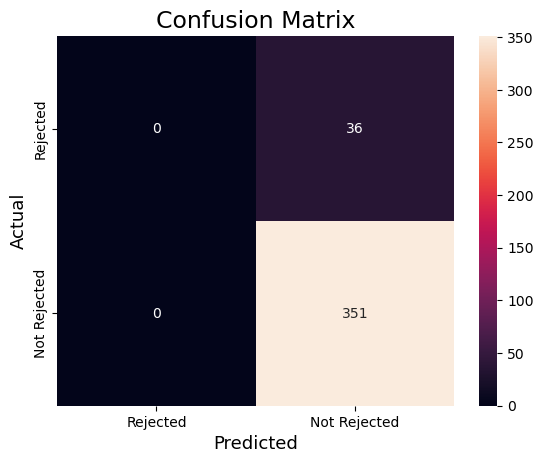

In [126]:
labels = [1, 0]
cm = confusion_matrix(y_test,y_pred, labels=labels)

sns.heatmap(cm,
            annot=True,
            fmt='g',
            xticklabels=['Rejected','Not Rejected'],
            yticklabels=['Rejected','Not Rejected'])
plt.ylabel('Actual',fontsize=13)
plt.xlabel('Predicted',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()
# still predicting almost all in the positive class

In [127]:
classifier.predict_proba(X_test)
# closer percentages though

array([[0.63388139, 0.36611861],
       [0.60620883, 0.39379117],
       [0.66664358, 0.33335642],
       [0.61796687, 0.38203313],
       [0.62023576, 0.37976424],
       [0.63991687, 0.36008313],
       [0.71152401, 0.28847599],
       [0.63077905, 0.36922095],
       [0.69510743, 0.30489257],
       [0.68111219, 0.31888781],
       [0.66616801, 0.33383199],
       [0.73609781, 0.26390219],
       [0.5864886 , 0.4135114 ],
       [0.65438818, 0.34561182],
       [0.68987715, 0.31012285],
       [0.7000619 , 0.2999381 ],
       [0.62680353, 0.37319647],
       [0.5547047 , 0.4452953 ],
       [0.69810587, 0.30189413],
       [0.68118298, 0.31881702],
       [0.64553209, 0.35446791],
       [0.60657865, 0.39342135],
       [0.64076596, 0.35923404],
       [0.65004896, 0.34995104],
       [0.62174234, 0.37825766],
       [0.66616238, 0.33383762],
       [0.60660789, 0.39339211],
       [0.70621451, 0.29378549],
       [0.63581685, 0.36418315],
       [0.61554108, 0.38445892],
       [0.

In [128]:
oversample = RandomOverSampler(sampling_strategy='minority')

In [129]:
X_train, y_train = oversample.fit_resample(X_train, y_train)

In [130]:
y_train.sum()/y_train.count()
# now we have a 50/50 split

0.5

In [131]:
classifier = LogisticRegression(random_state = 42)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [132]:
y_pred = classifier.predict(X_test)

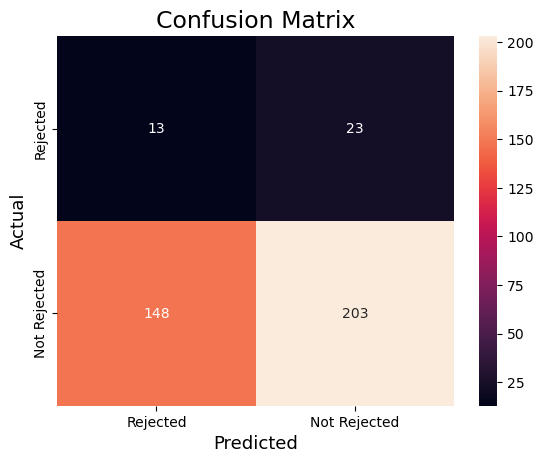

In [133]:
labels = [1, 0]
cm = confusion_matrix(y_test,y_pred, labels=labels)

sns.heatmap(cm,
            annot=True,
            fmt='g',
            xticklabels=['Rejected','Not Rejected'],
            yticklabels=['Rejected','Not Rejected'])
plt.ylabel('Actual',fontsize=13)
plt.xlabel('Predicted',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()
# model not doing a great job at distinguishing which credit cards should be rejected